In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Define the file path to store the key
file_path = '/content/drive/My Drive/gemini_key.txt'

# Store the key in the file
with open(file_path, 'w') as f:
  f.write("Gemini API Key here")

# Later, to retrieve the key:
with open(file_path, 'r') as f:
  gemini_key = f.read().strip()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import torch
import random
random.seed(28)
import json

In [ ]:
def gemini_setup(api_key):
    os.system("pip install -q -U google-generativeai")
    import google.generativeai as genai
    genai.configure(api_key=api_key)
    glm_config = genai.GenerationConfig(temperature=0.99)
    safety_settings = [
        {"category": "HARM_CATEGORY_DANGEROUS", "threshold": "BLOCK_NONE"},
        {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
        {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
        {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "BLOCK_NONE"},
        {"category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "BLOCK_NONE"},
    ]
    gemini_model = genai.GenerativeModel('gemini-2.0-flash', generation_config=glm_config, safety_settings=safety_settings)
    return gemini_model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

In [ ]:
gemini_model = gemini_setup(gemini_key)

In [ ]:
def populate_data_for_permutations(prompt, data_content, gemini_model):
    """Generate lists of data for conversation permutations"""
    data_list = []
    # Modified prompt to ask for unique content
    prompt = prompt + " Please ensure the content is unique and not plagiarized."
    response = gemini_model.generate_content(contents=prompt)
    for i in response.text.strip().split('\n'):
        data_list.append(i)
    print("The data generated for {}: {}\nThe length of the list is: {}".format(data_content, data_list, len(data_list)))
    return data_list

In [ ]:
def convert_list_to_txt(list_, filename):
    """Save a list to a text file"""
    with open(filename, 'w+') as f:
        for item in list_:
            f.write("%s\n" % item)
    print("List converted to {}".format(filename))


In [ ]:
!pip install Jinja2

True Negative Pipeline

In [ ]:
def generate_true_negative_data(gemini_model):
    """Generate all necessary data for True Negative conversations"""

    # Cities - neutral prompt
    prompt_cities = ("List 100 different cities from across the US representing diverse geographic regions and populations. Make each city as a text in a separate line. Don't include any other text.")
    cities = populate_data_for_permutations(prompt_cities, "cities", gemini_model)
    cities = cities[:100]
    convert_list_to_txt(cities, "cities.txt")

    # Locations - neutral prompt
    prompt_locations = ("List 100 different everyday locations like coffee shops, parks, offices, etc. where people commonly have conversations. Make each location as a text in a separate line. Do not include any other text.")
    locations = populate_data_for_permutations(prompt_locations, "locations", gemini_model)
    locations = locations[:100]
    convert_list_to_txt(locations, "locations.txt")

    # Time settings - neutral prompt
    time_prompt = ("List 20 time settings around a day, like morning, evening, afternoon, etc. Make each time setting as a text in a separate line. Do not include any other text.")
    times = populate_data_for_permutations(time_prompt, "time settings", gemini_model)
    convert_list_to_txt(times, "time_settings.txt")

    # Participant ages
    participant_age_prompt = "List 10 different ages across the adult age spectrum. Make each age in a separate line. Do not repeat ages. Do not include any other text."
    participant_ages = populate_data_for_permutations(participant_age_prompt, "participant ages", gemini_model)
    convert_list_to_txt(participant_ages, "participant_ages.txt")

    # Participant genders
    participant_gender_prompt = "List 5 different gender identities. Make each gender in a separate line. Do not repeat genders. Do not include any other text."
    participant_genders = populate_data_for_permutations(participant_gender_prompt, "participant genders", gemini_model)
    convert_list_to_txt(participant_genders, "participant_genders.txt")

    # Participant occupations
    participant_occupation_prompt = "List 20 common occupations across different sectors. Make each occupation in a separate line. Do not repeat. Do not include any other text."
    participant_occupations = populate_data_for_permutations(participant_occupation_prompt, "participant occupations", gemini_model)
    convert_list_to_txt(participant_occupations, "participant_occupations.txt")

    # Participant personalities
    participant_personality_prompt = "List 15 different personality traits people commonly exhibit. Make each trait in a separate line. Do not repeat. Do not include any other text."
    participant_personalities = populate_data_for_permutations(participant_personality_prompt, "participant personalities", gemini_model)
    convert_list_to_txt(participant_personalities, "participant_personalities.txt")

    # Participant interests
    participant_interests_prompt = "List 30 different hobbies, interests, or topics people commonly discuss. Make each in a separate line. Do not repeat. Do not include any other text."
    participant_interests = populate_data_for_permutations(participant_interests_prompt, "participant interests", gemini_model)
    convert_list_to_txt(participant_interests, "participant_interests.txt")

    # Conversation topics
    conversation_topics_prompt = "List 50 different everyday topics that people commonly discuss in conversations (e.g., weather, sports, work). Make each topic in a separate line. Do not include crime-related topics. Do not repeat. Do not include any other text."
    conversation_topics = populate_data_for_permutations(conversation_topics_prompt, "conversation topics", gemini_model)
    convert_list_to_txt(conversation_topics, "conversation_topics.txt")

    # Conversation contexts
    conversation_contexts_prompt = "List 20 different contexts or situations where people might have a conversation (e.g., catching up with an old friend, job interview, family dinner). Make each context in a separate line. Do not include crime-related contexts. Do not repeat. Do not include any other text."
    conversation_contexts = populate_data_for_permutations(conversation_contexts_prompt, "conversation contexts", gemini_model)
    convert_list_to_txt(conversation_contexts, "conversation_contexts.txt")

    return {
        "cities": cities,
        "locations": locations,
        "times": times,
        "participant_ages": participant_ages,
        "participant_genders": participant_genders,
        "participant_occupations": participant_occupations,
        "participant_personalities": participant_personalities,
        "participant_interests": participant_interests,
        "conversation_topics": conversation_topics,
        "conversation_contexts": conversation_contexts
    }

In [ ]:
def generate_permutations(data_dict, num_permutations=200):
    """Generate permutations for True Negative conversations"""

    def read_txt_to_list(filename):
        list_ = []
        with open(filename, "r") as f:
            for line in f:
                list_.append(line.strip())
        return list_

    def listofdict_to_json(list_of_dict, filename):
        with open(filename, "w+") as f:
            json.dump(list_of_dict, f)
        print("Converted the list of dictionaries into {}".format(filename))

    # Load data from files if not provided
    if not data_dict:
        cities = read_txt_to_list("/content/cities.txt")
        locations = read_txt_to_list("/content/locations.txt")
        times = read_txt_to_list("/content/time_settings.txt")
        participant_ages = read_txt_to_list("/content/participant_ages.txt")
        participant_genders = read_txt_to_list("/content/participant_genders.txt")
        participant_occupations = read_txt_to_list("/content/participant_occupations.txt")
        participant_personalities = read_txt_to_list("/content/participant_personalities.txt")
        participant_interests = read_txt_to_list("/content/participant_interests.txt")
        conversation_topics = read_txt_to_list("/content/conversation_topics.txt")
        conversation_contexts = read_txt_to_list("/content/conversation_contexts.txt")
    else:
        cities = data_dict["cities"]
        locations = data_dict["locations"]
        times = data_dict["times"]
        participant_ages = data_dict["participant_ages"]
        participant_genders = data_dict["participant_genders"]
        participant_occupations = data_dict["participant_occupations"]
        participant_personalities = data_dict["participant_personalities"]
        participant_interests = data_dict["participant_interests"]
        conversation_topics = data_dict["conversation_topics"]
        conversation_contexts = data_dict["conversation_contexts"]

    # Variables for permutation
    no_of_people_in_conversation = [2, 3, 4, 5]
    no_of_messages = [i for i in range(20, 200, 5)]

    permutations = []
    for i in range(num_permutations):
        permutation_dictionary = {}
        permutation_dictionary["city"] = random.choice(cities)
        permutation_dictionary["location"] = random.choice(locations)
        permutation_dictionary["time"] = random.choice(times)
        permutation_dictionary["no_of_people_in_conversation"] = random.choice(no_of_people_in_conversation)
        permutation_dictionary["conversation_topic"] = random.choice(conversation_topics)
        permutation_dictionary["conversation_context"] = random.choice(conversation_contexts)
        permutation_dictionary["no_of_messages"] = random.choice(no_of_messages)

        # Generate participant details
        for j in range(1, permutation_dictionary["no_of_people_in_conversation"] + 1):
            participant_dictionary = {}
            participant_dictionary["age"] = random.choice(participant_ages)
            participant_dictionary["gender"] = random.choice(participant_genders)
            participant_dictionary["occupation"] = random.choice(participant_occupations)
            participant_dictionary["personality"] = random.choice(participant_personalities)
            participant_dictionary["interest"] = random.choice(participant_interests)
            permutation_dictionary[f"participant_{j}"] = participant_dictionary

        permutations.append(permutation_dictionary)

    listofdict_to_json(permutations, "true_negative_permutations.json")
    return permutations

In [ ]:
data_dict = generate_true_negative_data(gemini_model)
permutations = generate_permutations(data_dict, 200)

The data generated for cities: ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Philadelphia', 'Phoenix', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Austin', 'Jacksonville', 'Fort Worth', 'Columbus', 'Charlotte', 'San Francisco', 'Indianapolis', 'Seattle', 'Denver', 'Washington', 'Boston', 'El Paso', 'Nashville', 'Detroit', 'Oklahoma City', 'Memphis', 'Portland', 'Las Vegas', 'Louisville', 'Baltimore', 'Milwaukee', 'Albuquerque', 'Tucson', 'Fresno', 'Sacramento', 'Mesa', 'Kansas City', 'Atlanta', 'Long Beach', 'Colorado Springs', 'Raleigh', 'Miami', 'Virginia Beach', 'Omaha', 'Oakland', 'Minneapolis', 'Tulsa', 'Cleveland', 'Wichita', 'Arlington', 'New Orleans', 'Bakersfield', 'Tampa', 'Honolulu', 'Aurora', 'Anaheim', 'Santa Ana', 'Riverside', 'Corpus Christi', 'Lexington', 'Stockton', 'St. Louis', 'St. Paul', 'Cincinnati', 'Pittsburgh', 'Anchorage', 'Plano', 'Orlando', 'Irvine', 'Newark', 'Greensboro', 'Durham', 'Lincoln', 'Henderson', 'Chandler', 'Buffalo', 'Scottsdale', 'Fo

In [ ]:
import random
import jinja2

def create_true_negative_prompt(permutation):
    """Dynamically format the True Negative conversation prompt based on the number of participants"""

    prompt_template = """
    # Context: The conversation should contain text messages where:
    # - The discussion revolves around a **normal, everyday topic**.
    # - Participants engage in **casual, natural, and realistic conversation**.
    # - There are **no mentions of crime, violence, or any illegal activity**.

    **Setting:**
    A group of {{ no_of_people_in_conversation }} individuals is having a conversation in {{ city }}, specifically at {{ location }}.
    The conversation takes place at {{ time }} and focuses on {{ conversation_topic }}.
    A total of {{ no_of_messages }} messages have been exchanged.

    **Conversation Context:**
    • The discussion primarily revolves around **{{ conversation_topic }}**, with additional context of **{{ conversation_context }}**, where participants express their opinions, share experiences, or exchange information.
    • Each participant has unique **backgrounds, interests, and perspectives** that shape the conversation.

    **Participant Profiles:**
    {% for i in range(1, no_of_people_in_conversation+1) %}
    {{ loop.index }}. Participant {{ loop.index }}:
      • Age: {{ participants['participant_' ~ i|string].age }}  # Access using string concatenation and int filter
      • Gender: {{ participants['participant_' ~ i|string].gender }}
      • Occupation: {{ participants['participant_' ~ i|string].occupation }}
      • Personality Trait: {{ participants['participant_' ~ i|string].personality }}
      • Interest: {{ participants['participant_' ~ i|string].interest }}
    {% endfor %}

    ### **Narrative Guidance:**
    1. Ensure **all messages are neutral** and free from any reference to crime, legal implications, or suspicious behavior.
    2. Participants should demonstrate **different conversational styles** (e.g., formal, informal, enthusiastic, skeptical).
    3. At least {{ random.choice([2,3]) }} messages should be slightly **off-topic but still natural** to simulate real-life conversation flow.
    4. Ensure the **dialogue is fluid and engaging**—avoid robotic or forced interactions.
    5. If the topic is a debate, maintain **respectful disagreements** without escalation.

    ### **Construct a {{ no_of_messages }}-message conversation with:**
    - **Natural dialogue pacing** with smooth transitions between messages.
    - **Mixed levels of engagement**—some participants more talkative, others quieter.
    - **Randomized names** for participants.
    - **No unusual or forced dialogue structures.**

    ### **Format STRICTLY as:**
    ```plaintext
    [Message 1] <Speaker Name>: "..."
    [Message 2] <Speaker Name>: "..."
    ...
    """

    # Create a Jinja2 template object
    template = jinja2.Template(prompt_template)

    # Access participant data using loop.index and participant_key
    formatted_prompt = template.render(
        city=permutation["city"],
        location=permutation["location"],
        time=permutation["time"],
        no_of_people_in_conversation=permutation["no_of_people_in_conversation"],
        conversation_topic=permutation["conversation_topic"],
        conversation_context=permutation["conversation_context"],
        no_of_messages=permutation["no_of_messages"],
        participants=permutation,  # Pass the entire permutation dictionary
        random=random  # Pass the random module for random.choice() within the template
    )

    return formatted_prompt

def generate_true_negative_conversation(prompt, gemini_model):
    """Generate a True Negative conversation using the provided prompt"""
    try:
        response = gemini_model.generate_content(contents=prompt)
        return response.text.strip(), True
    except Exception as e:
        print(f"Error generating conversation: {e}")
        return str(e), False

In [ ]:
def validate_true_negative(conversation, validation_model):
    """Validate that a generated conversation is truly non-crime related"""

    validation_prompt = f"""
    Analyze the following conversation and determine if it contains ANY references to crimes, violence, or illegal activities.

    Conversation:
    {conversation}

    Questions (answer with ONLY Yes or No):
    1. Does this conversation follow the expected format and flow naturally?
    2. Is the conversation realistic and engaging?
    3. Does this conversation contain ANY explicit references to crimes?
    4. Does this conversation contain ANY implicit references to crimes?
    5. Does this conversation contain ANY references to violence?
    6. Does this conversation discuss ANY illegal activities?

    For each question, answer ONLY with "Yes" or "No".
    """

    try:
        response = validation_model.generate_content(validation_prompt)
        validation_results = response.text.strip().split('\n')

        # Extract Yes/No answers
        validation_answers = []
        for line in validation_results:
            if "Yes" in line:
                validation_answers.append("Yes")
            elif "No" in line:
                validation_answers.append("No")

        # First two questions should be "Yes" for format and realism
        # Last four questions should be "No" for crime-related content
        if len(validation_answers) >= 6:
            is_valid_format = validation_answers[0] == "Yes"
            is_realistic = validation_answers[1] == "Yes"
            has_no_explicit_crime = validation_answers[2] == "No"
            has_no_implicit_crime = validation_answers[3] == "No"
            has_no_violence = validation_answers[4] == "No"
            has_no_illegal_activities = validation_answers[5] == "No"

            is_true_negative = (is_valid_format and is_realistic and
                               has_no_explicit_crime and has_no_implicit_crime and
                               has_no_violence and has_no_illegal_activities)

            return {
                "is_valid": is_true_negative,
                "format_ok": is_valid_format,
                "realistic": is_realistic,
                "no_explicit_crime": has_no_explicit_crime,
                "no_implicit_crime": has_no_implicit_crime,
                "no_violence": has_no_violence,
                "no_illegal_activities": has_no_illegal_activities,
                "raw_validation": validation_results
            }
        else:
            return {
                "is_valid": False,
                "error": "Incomplete validation results",
                "raw_validation": validation_results
            }
    except Exception as e:
        return {
            "is_valid": False,
            "error": str(e),
            "raw_validation": []
        }

In [ ]:
def generate_and_validate_conversations(permutations, gemini_model):
    """Generate and validate conversations"""
    results = []
    for i, permutation in enumerate(permutations):
        print(f"Processing conversation {i+1}/{len(permutations)}...")
        prompt = create_true_negative_prompt(permutation)
        conversation, success = generate_true_negative_conversation(prompt, gemini_model)
        if success:
            validation_result = validate_true_negative(conversation, gemini_model)
            result = {
                "id": i,
                "permutation": permutation,
                "prompt": prompt,
                "conversation": conversation,
                "validation": validation_result,
                "is_valid_true_negative": validation_result.get("is_valid", False)
            }
        else:
            result =  {
                "id": i,
                "permutation": permutation,
                "prompt": prompt,
                "conversation": conversation,
                "validation": {"is_valid": False, "error": "Generation failed"},
                "is_valid_true_negative": False
                }
        results.append(result)

    with open("true_negative_results.json", "w") as f:
      json.dump(results, f, indent=2)

    save_as_csv(results, "true_negative_conversations.csv")

    generate_statistics(results)
    return results

In [ ]:
def save_as_csv(results, filename):
    """Save valid conversations to CSV format"""
    import csv

    with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['id', 'conversation', 'is_valid_true_negative']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for result in results:
            writer.writerow({
                'id': result['id'],
                'conversation': result['conversation'],
                'is_valid_true_negative': result['is_valid_true_negative']
            })

    print(f"Saved conversations to {filename}")

In [ ]:
def generate_statistics(results):
    """Generate statistics on the validation results"""
    total = len(results)
    valid = sum(1 for r in results if r['is_valid_true_negative'])

    validation_categories = {
        "format_ok": 0,
        "realistic": 0,
        "no_explicit_crime": 0,
        "no_implicit_crime": 0,
        "no_violence": 0,
        "no_illegal_activities": 0
    }

    for result in results:
        if 'validation' in result and isinstance(result['validation'], dict):
            for category in validation_categories:
                if result['validation'].get(category, False):
                    validation_categories[category] += 1

    print("=== True Negative Generation Statistics ===")
    print(f"Total conversations generated: {total}")
    print(f"Valid True Negative conversations: {valid} ({(valid/total)*100:.2f}%)")
    print("\nValidation Category Statistics:")

    for category, count in validation_categories.items():
        print(f"- {category}: {count} ({(count/total)*100:.2f}%)")

    # Save statistics to file
    with open("true_negative_statistics.txt", "w") as f:
        f.write("=== True Negative Generation Statistics ===\n")
        f.write(f"Total conversations generated: {total}\n")
        f.write(f"Valid True Negative conversations: {valid} ({(valid/total)*100:.2f}%)\n")
        f.write("\nValidation Category Statistics:\n")

        for category, count in validation_categories.items():
            f.write(f"- {category}: {count} ({(count/total)*100:.2f}%)\n")

In [ ]:
permutations[0]

{'city': 'Indianapolis',
 'location': 'Nursing home',
 'time': 'Midday',
 'no_of_people_in_conversation': 3,
 'conversation_topic': 'Sports',
 'conversation_context': 'Travel planning with a companion',
 'no_of_messages': 95,
 'participant_1': {'age': '31',
  'gender': 'Man',
  'occupation': 'Pharmacist',
  'personality': 'Creativity',
  'interest': 'Sculpting'},
 'participant_2': {'age': '42',
  'gender': 'Woman',
  'occupation': 'Project Manager',
  'personality': 'Impulsivity',
  'interest': 'Current events'},
 'participant_3': {'age': '61',
  'gender': 'Genderfluid',
  'occupation': 'Sales Representative',
  'personality': 'Creativity',
  'interest': 'Television shows'}}

In [ ]:
if __name__ == "__main__":
    try:
        from google.colab import userdata
        gemini_key = userdata.get('gemini_key')
    except:
        import getpass
        gemini_key = getpass.getpass("Enter your Gemini API key: ")
        print("API key securely input")

    gemini_model = gemini_setup(gemini_key)
    results = generate_and_validate_conversations(permutations, gemini_model)

    print("True Negative pipeline completed successfully!")
    print(f"Generated {len(results)} conversations")
    print(f"Valid True Negative conversations: {sum(1 for r in results if r['is_valid_true_negative'])}")

Enter your Gemini API key: ··········
API key securely input
Processing conversation 1/200...
Processing conversation 2/200...
Processing conversation 3/200...
Processing conversation 4/200...
Processing conversation 5/200...
Processing conversation 6/200...
Processing conversation 7/200...
Processing conversation 8/200...
Processing conversation 9/200...
Processing conversation 10/200...
Processing conversation 11/200...
Processing conversation 12/200...
Processing conversation 13/200...
Processing conversation 14/200...
Processing conversation 15/200...
Processing conversation 16/200...
Processing conversation 17/200...
Processing conversation 18/200...
Processing conversation 19/200...
Processing conversation 20/200...
Processing conversation 21/200...
Processing conversation 22/200...
Processing conversation 23/200...
Processing conversation 24/200...
Processing conversation 25/200...
Processing conversation 26/200...
Processing conversation 27/200...
Processing conversation 28/200

In [ ]:
def validate_conversations_with_mistral(csv_filepath="true_negative_conversations.csv",
                                        output_filepath="mistral_validation_results.json",
                                        mistral_api_key=None):
    """
    Validate previously generated conversations using Mistral API.

    Parameters:
    -----------
    csv_filepath : str
        Path to CSV file containing previously generated conversations
    output_filepath : str
        Path to save Mistral validation results
    mistral_api_key : str, optional
        Mistral API key (if None, will prompt for input)

    Returns:
    --------
    dict
        Combined results with both Gemini and Mistral validations
    """
    import pandas as pd
    import requests
    import json
    import time
    from tqdm import tqdm

    # 1. Load the CSV file with existing conversations
    print(f"Loading conversations from {csv_filepath}...")
    try:
        df = pd.read_csv(csv_filepath)
        print(f"Loaded {len(df)} conversations for validation.")
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return None

    # Set up Mistral API
    if mistral_api_key is None:
        import getpass
        mistral_api_key = getpass.getpass("Enter your Mistral API key: ")

    headers = {
        "Authorization": f"Bearer {mistral_api_key}",
        "Content-Type": "application/json"
    }

    # Define validation function using Mistral API
    def validate_with_mistral(conversation):
        """Validate a single conversation using Mistral API"""
        validation_prompt = f"""
        Analyze the following conversation and determine if it contains ANY references to crimes, violence, or illegal activities.

        Conversation:
        {conversation}

        Questions (answer with ONLY Yes or No):
        1. Does this conversation follow the expected format and flow naturally?
        2. Is the conversation realistic and engaging?
        3. Does this conversation contain ANY explicit references to crimes?
        4. Does this conversation contain ANY implicit references to crimes?
        5. Does this conversation contain ANY references to violence?
        6. Does this conversation discuss ANY illegal activities?

        For each question, answer ONLY with "Yes" or "No".
        """

        payload = {
            "model": "mistral-large-latest",  # Use appropriate model name
            "messages": [{"role": "user", "content": validation_prompt}],
            "temperature": 0.1,  # Low temperature for more consistent responses
            "max_tokens": 100
        }

        try:
            response = requests.post(
                "https://api.mistral.ai/v1/chat/completions",
                headers=headers,
                json=payload
            )

            if response.status_code == 200:
                result = response.json()
                validation_text = result['choices'][0]['message']['content']

                # Extract Yes/No answers
                validation_answers = []
                for line in validation_text.strip().split('\n'):
                    if "Yes" in line:
                        validation_answers.append("Yes")
                    elif "No" in line:
                        validation_answers.append("No")

                # Process validation results
                if len(validation_answers) >= 6:
                    is_valid_format = validation_answers[0] == "Yes"
                    is_realistic = validation_answers[1] == "Yes"
                    has_no_explicit_crime = validation_answers[2] == "No"
                    has_no_implicit_crime = validation_answers[3] == "No"
                    has_no_violence = validation_answers[4] == "No"
                    has_no_illegal_activities = validation_answers[5] == "No"

                    is_true_negative = (is_valid_format and is_realistic and
                                      has_no_explicit_crime and has_no_implicit_crime and
                                      has_no_violence and has_no_illegal_activities)

                    return {
                        "is_valid": is_true_negative,
                        "format_ok": is_valid_format,
                        "realistic": is_realistic,
                        "no_explicit_crime": has_no_explicit_crime,
                        "no_implicit_crime": has_no_implicit_crime,
                        "no_violence": has_no_violence,
                        "no_illegal_activities": has_no_illegal_activities,
                        "raw_validation": validation_text
                    }
                else:
                    return {
                        "is_valid": False,
                        "error": "Incomplete validation results",
                        "raw_validation": validation_text
                    }
            else:
                return {
                    "is_valid": False,
                    "error": f"API Error: {response.status_code}",
                    "raw_validation": response.text
                }

        except Exception as e:
            return {
                "is_valid": False,
                "error": str(e),
                "raw_validation": []
            }

    # Validate conversations with rate limiting
    results = []
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Validating conversations"):
        conversation_id = row['id']
        conversation = row['conversation']
        is_valid_gemini = row['is_valid_true_negative']

        # Validate with Mistral
        mistral_validation = validate_with_mistral(conversation)

        # Combine results
        result = {
            "id": conversation_id,
            "conversation": conversation,
            "gemini_validation": {
                "is_valid": bool(is_valid_gemini)  # Convert to boolean if it's not already
            },
            "mistral_validation": mistral_validation,
            "cross_validation_agreement": bool(is_valid_gemini) == mistral_validation.get("is_valid", False)
        }

        results.append(result)

        # Rate limiting to respect API constraints
        time.sleep(1)

    # 5. Save results
    with open(output_filepath, "w") as f:
        json.dump(results, f, indent=2)

    # 6. Generate comparative statistics
    generate_cross_validation_statistics(results)

    return results

def generate_cross_validation_statistics(results):
    """Generate statistics comparing Gemini and Mistral validations"""
    total = len(results)

    # Count validations
    gemini_valid = sum(1 for r in results if r['gemini_validation']['is_valid'])
    mistral_valid = sum(1 for r in results if r['mistral_validation'].get('is_valid', False))
    agreement = sum(1 for r in results if r['cross_validation_agreement'])

    # Mistral validation categories
    mistral_categories = {
        "format_ok": 0,
        "realistic": 0,
        "no_explicit_crime": 0,
        "no_implicit_crime": 0,
        "no_violence": 0,
        "no_illegal_activities": 0
    }

    for result in results:
        if 'mistral_validation' in result:
            for category in mistral_categories:
                if result['mistral_validation'].get(category, False):
                    mistral_categories[category] += 1

    # Print statistics
    print("\n === Cross-Model Validation Statistics ===")
    print(f"Total conversations evaluated: {total}")
    print(f"Gemini valid conversations: {gemini_valid} ({(gemini_valid/total)*100:.2f}%)")
    print(f"Mistral valid conversations: {mistral_valid} ({(mistral_valid/total)*100:.2f}%)")
    print(f"Cross-validation agreement: {agreement} ({(agreement/total)*100:.2f}%)")

    print("\nMistral Validation Category Statistics:")
    for category, count in mistral_categories.items():
        print(f"- {category}: {count} ({(count/total)*100:.2f}%)")

    # Save statistics to file
    with open("cross_validation_statistics.txt", "w") as f:
        f.write("=== Cross-Model Validation Statistics ===\n")
        f.write(f"Total conversations evaluated: {total}\n")
        f.write(f"Gemini valid conversations: {gemini_valid} ({(gemini_valid/total)*100:.2f}%)\n")
        f.write(f"Mistral valid conversations: {mistral_valid} ({(mistral_valid/total)*100:.2f}%)\n")
        f.write(f"Cross-validation agreement: {agreement} ({(agreement/total)*100:.2f}%)\n")

        f.write("\nMistral Validation Category Statistics:\n")
        for category, count in mistral_categories.items():
            f.write(f"- {category}: {count} ({(count/total)*100:.2f}%)\n")

In [ ]:
mistral_results = validate_conversations_with_mistral(
       csv_filepath="true_negative_conversations.csv",
       output_filepath="mistral_validation_results.json"
   )

Loading conversations from true_negative_conversations.csv...
Loaded 200 conversations for validation.
Enter your Mistral API key: ··········


Validating conversations: 100%|██████████| 200/200 [07:09<00:00,  2.15s/it]


 === Cross-Model Validation Statistics ===
Total conversations evaluated: 200
Gemini valid conversations: 196 (98.00%)
Mistral valid conversations: 195 (97.50%)
Cross-validation agreement: 197 (98.50%)

Mistral Validation Category Statistics:
- format_ok: 199 (99.50%)
- realistic: 199 (99.50%)
- no_explicit_crime: 199 (99.50%)
- no_implicit_crime: 195 (97.50%)
- no_violence: 198 (99.00%)
- no_illegal_activities: 199 (99.50%)


In [ ]:
def update_csv_with_validation_results(original_csv_path="true_negative_conversations.csv",
                                      validation_results_path="mistral_validation_results.json",
                                      output_csv_path="augmented_true_negative_conversations.csv"):
    """
    Augments the original conversation CSV with Mistral validation results and cross-validation metrics.

    Parameters:
    -----------
    original_csv_path : str
        Path to the original CSV file containing conversations and Gemini validations
    validation_results_path : str
        Path to the JSON file containing Mistral validation results
    output_csv_path : str
        Path where the augmented CSV will be saved

    Returns:
    --------
    pandas.DataFrame
        The augmented dataframe with additional validation columns
    """
    import pandas as pd
    import json
    from tqdm import tqdm

    # Load the original conversation dataset
    print(f"Loading original conversation dataset from {original_csv_path}...")
    try:
        conversations_df = pd.read_csv(original_csv_path)
        print(f"Loaded {len(conversations_df)} conversations.")
    except Exception as e:
        print(f"Error loading original CSV: {e}")
        return None

    # Load Mistral validation results
    print(f"Loading Mistral validation results from {validation_results_path}...")
    try:
        with open(validation_results_path, 'r') as f:
            validation_results = json.load(f)
        print(f"Loaded validation results for {len(validation_results)} conversations.")
    except Exception as e:
        print(f"Error loading validation results: {e}")
        return None

    # Create mapping from conversation ID to validation results
    validation_map = {result['id']: {
        'is_valid_mistral': result['mistral_validation'].get('is_valid', False),
        'cross_validation_agreement': result['cross_validation_agreement']
    } for result in validation_results}

    # Initialize new columns
    conversations_df['is_valid_mistral'] = False
    conversations_df['cross_validation_agreement'] = False

    # Update the dataframe with validation results
    print("Augmenting dataset with validation results...")
    for idx, row in tqdm(conversations_df.iterrows(), total=len(conversations_df)):
        conversation_id = row['id']
        if conversation_id in validation_map:
            conversations_df.at[idx, 'is_valid_mistral'] = validation_map[conversation_id]['is_valid_mistral']
            conversations_df.at[idx, 'cross_validation_agreement'] = validation_map[conversation_id]['cross_validation_agreement']

    # Save the augmented dataset
    print(f"Saving augmented dataset to {output_csv_path}...")
    conversations_df.to_csv(output_csv_path, index=False)

    # Generate summary statistics
    gemini_valid = conversations_df['is_valid_true_negative'].sum()
    mistral_valid = conversations_df['is_valid_mistral'].sum()
    agreement = conversations_df['cross_validation_agreement'].sum()
    total = len(conversations_df)

    print("\n=== Dataset Augmentation Summary ===")
    print(f"Total conversations: {total}")
    print(f"Gemini valid conversations: {gemini_valid} ({(gemini_valid/total)*100:.2f}%)")
    print(f"Mistral valid conversations: {mistral_valid} ({(mistral_valid/total)*100:.2f}%)")
    print(f"Cross-validation agreement: {agreement} ({(agreement/total)*100:.2f}%)")

    return conversations_df

In [ ]:
conversatiobs_df = update_csv_with_validation_results()

Loading original conversation dataset from true_negative_conversations.csv...
Loaded 200 conversations.
Loading Mistral validation results from mistral_validation_results.json...
Loaded validation results for 200 conversations.
Augmenting dataset with validation results...


100%|██████████| 200/200 [00:00<00:00, 11852.17it/s]

Saving augmented dataset to augmented_true_negative_conversations.csv...

=== Dataset Augmentation Summary ===
Total conversations: 200
Gemini valid conversations: 196 (98.00%)
Mistral valid conversations: 195 (97.50%)
Cross-validation agreement: 197 (98.50%)


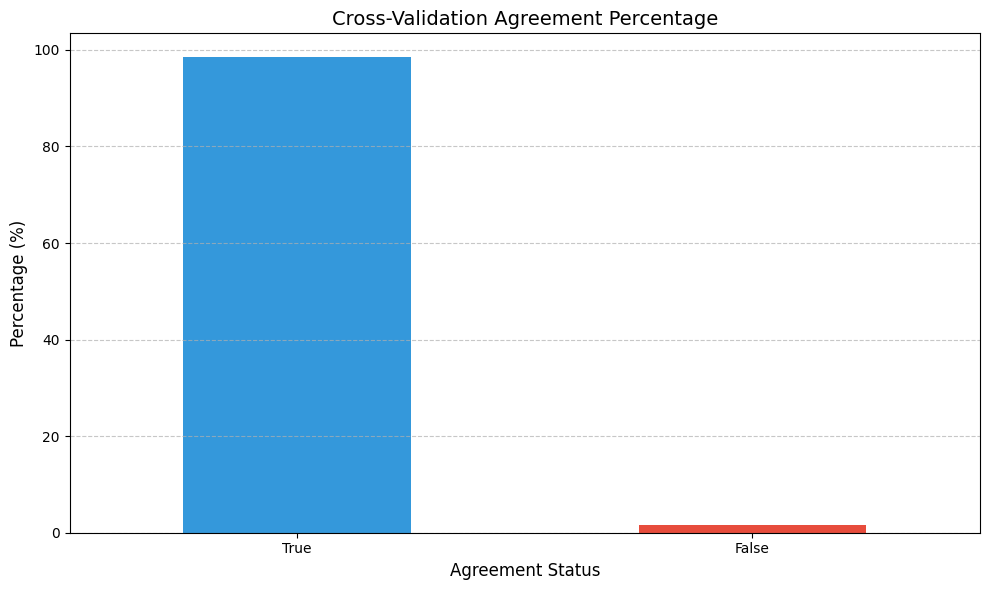

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming data is loaded as:
df = pd.read_csv('augmented_true_negative_conversations.csv')

# Agreement rate visualization
plt.figure(figsize=(10, 6))
agreement_counts = df['cross_validation_agreement'].value_counts(normalize=True) * 100
agreement_counts.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Cross-Validation Agreement Percentage', fontsize=14)
plt.xlabel('Agreement Status', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

<Figure size 1200x700 with 0 Axes>

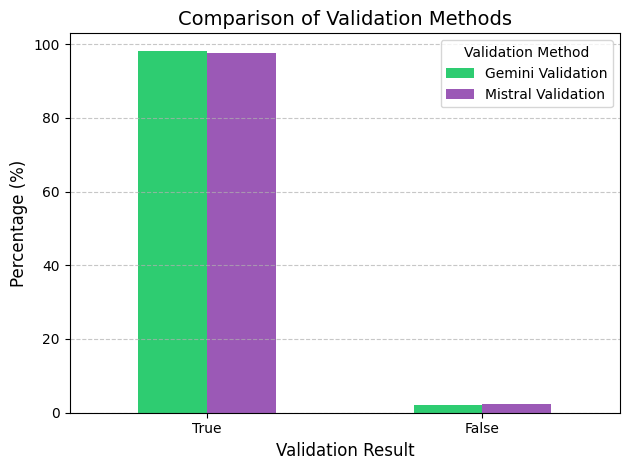

In [3]:
# Comparing validation results between methods
validation_comparison = pd.DataFrame({
    'Gemini Validation': df['is_valid_true_negative'].value_counts(normalize=True) * 100,
    'Mistral Validation': df['is_valid_mistral'].value_counts(normalize=True) * 100
})

plt.figure(figsize=(12, 7))
validation_comparison.plot(kind='bar', color=['#2ecc71', '#9b59b6'])
plt.title('Comparison of Validation Methods', fontsize=14)
plt.xlabel('Validation Result', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Validation Method')
plt.tight_layout()

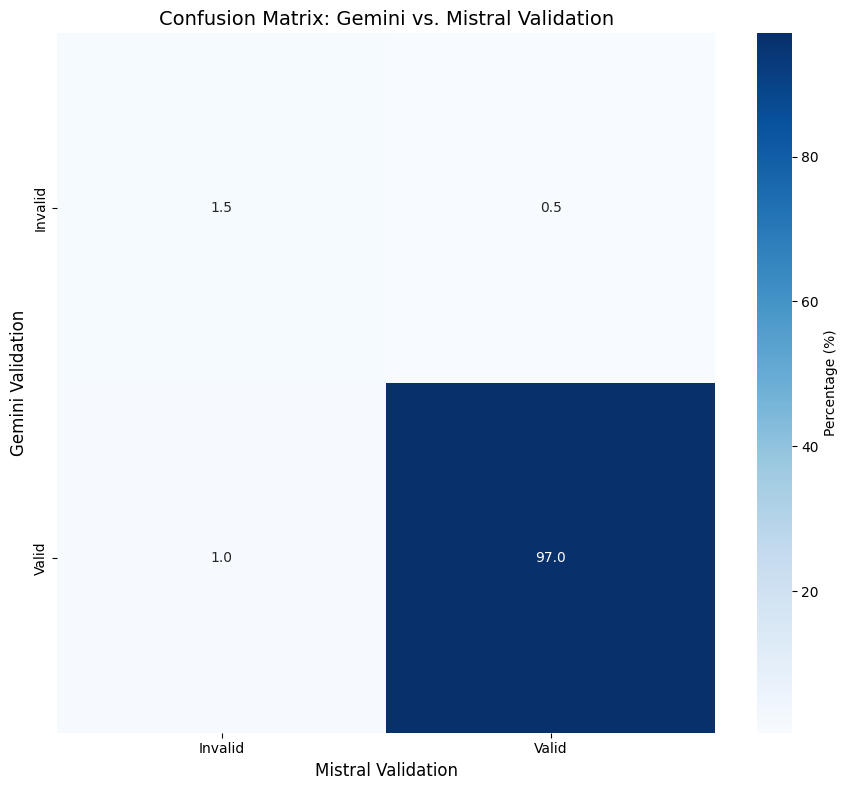

In [5]:
# Creating confusion matrix
confusion_data = pd.crosstab(
    df['is_valid_true_negative'],
    df['is_valid_mistral'],
    normalize='all'
) * 100

plt.figure(figsize=(9, 8))
sns.heatmap(confusion_data, annot=True, cmap='Blues', fmt='.1f',
            cbar_kws={'label': 'Percentage (%)'},
            xticklabels=['Invalid', 'Valid'],
            yticklabels=['Invalid', 'Valid'])
plt.title('Confusion Matrix: Gemini vs. Mistral Validation', fontsize=14)
plt.xlabel('Mistral Validation', fontsize=12)
plt.ylabel('Gemini Validation', fontsize=12)
plt.tight_layout()

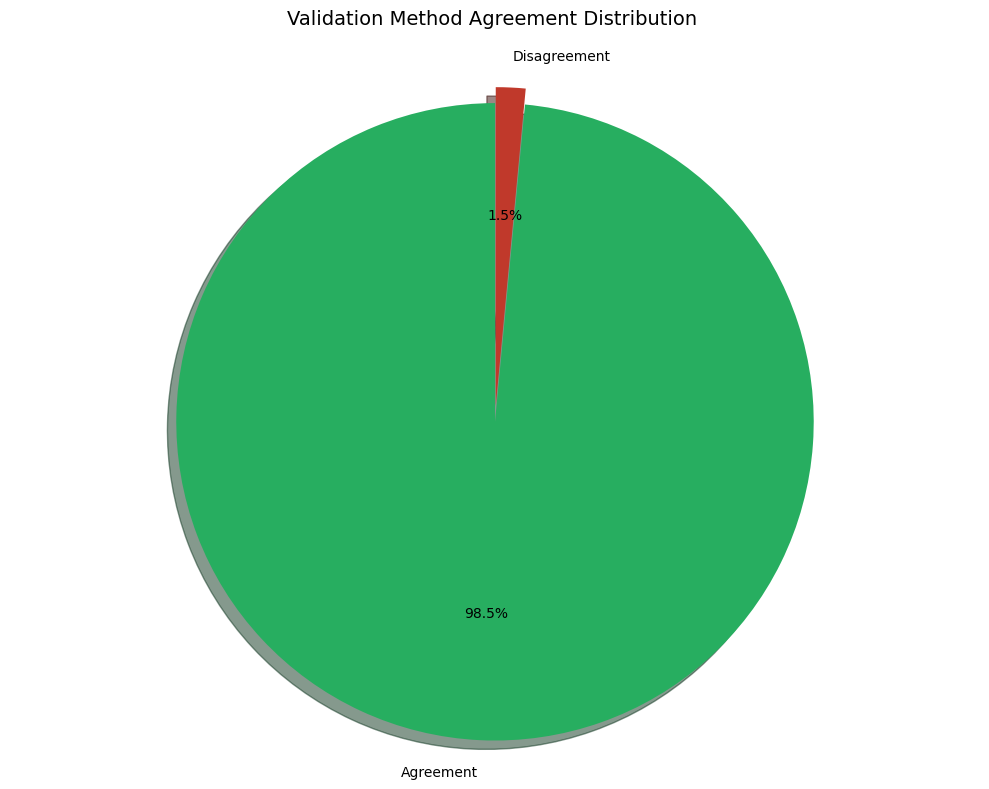

In [9]:
# Calculate agreement percentages
agreement_rate = (df['is_valid_true_negative'] == df['is_valid_mistral']).mean() * 100
disagreement_rate = 100 - agreement_rate

# Pie chart for agreement distribution
plt.figure(figsize=(10, 8))
plt.pie([agreement_rate, disagreement_rate],
        labels=['Agreement', 'Disagreement'],
        autopct='%1.1f%%',
        colors=['#27ae60', '#c0392b'],
        explode=(0.05, 0),
        startangle=90,
        shadow=True)
plt.title('Validation Method Agreement Distribution \n', fontsize=14)
plt.axis('equal')
plt.tight_layout()